In [ ]:
Steps:
    1.	Building Multiple Time series
    2.	Simplifying the time series
    3.	Creating a comparison pattern
    4.	Calculating Pearson Coloration
    5.	Reverse Arraying


# Importing Libraries

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Defining Path To data

In [26]:
# path_to_market_data = '/home/omark/Desktop/Polygraph/'
path_to_market_data = "D:\\NU-RESOURCES\\MATH103\\Polygraph"
pd.set_option('mode.chained_assignment', None)

# Load Data

In [6]:
heart_polygraph = pd.read_csv('HeartPulse_Modefied2.csv')
heart_polygraph = heart_polygraph.drop_duplicates(subset=['Time'])
heart_polygraph = heart_polygraph[['Time', 'Value']]
# heart_polygraph.columns
heart_polygraph.columns = ['Time', 'Value']

print(np.min(heart_polygraph['Time'] ),np.max(heart_polygraph['Time'] ))
heart_polygraph = heart_polygraph.sort_values('Time', ascending=True) 
heart_polygraph = heart_polygraph.dropna(how='any')

heart_polygraph

0.0 998.522895125554


,Time,Value
0,0.000000,57.142857
1,1.477105,83.116883
2,2.954210,124.675325
3,4.431315,153.246753
4,8.862629,148.051948
...,...,...
193,961.595273,67.532468
194,971.935007,77.922078
195,986.706056,62.337662
196,997.045790,64.935065


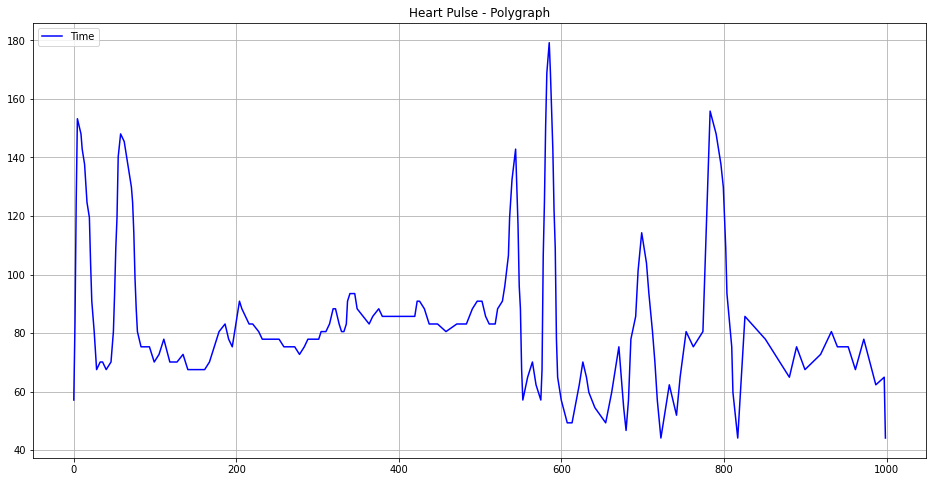

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(heart_polygraph['Time'], heart_polygraph['Value'], label='Time', color='blue')
plt.title('Heart Pulse - Polygraph')
plt.legend(loc='upper left')
plt.grid()
plt.show()

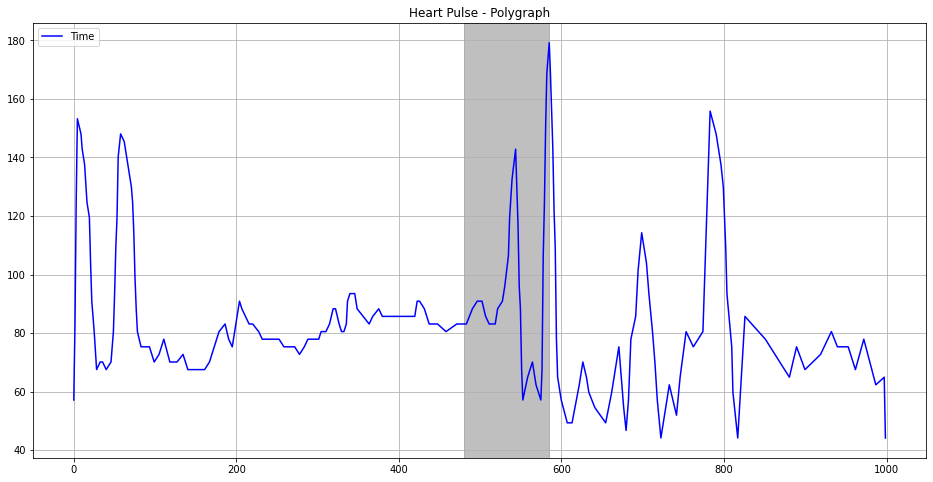

In [75]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(heart_polygraph['Time'], heart_polygraph['Value'], label='Time', color='blue')
plt.axvspan(480, 585, color='grey', alpha=0.5)
plt.title('Heart Pulse - Polygraph')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Pearson Corrleation and Split Sequence

In [8]:
def split_seq(seq, num_pieces):
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
        
def pearson(s1, s2):
    #take two pd.Series objects and return a pearson corrleation of them
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    return np.sum(s1_c*s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

# Building Time Series

In [9]:
lookback = 20
intervals = heart_polygraph['Time']
values = list(heart_polygraph['Value'].values)
counter_ = -1
price_series = []
for day in intervals:
    counter_ += 1
#     print(day, counter)
    if counter_ >= lookback:
        if day == heart_polygraph.iloc[-1].Time:
            price_series.append(values[counter_-lookback:counter_])
        else:
            price_series.append(values[counter_-lookback:counter_])
#             print(values[counter_-lookback:counter_])
                
timeseries_df = pd.DataFrame(price_series)

In [10]:
timeseries_df.shape

(178, 20)

In [11]:
# timeseries_df.head(40)
timeseries_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,57.142857,83.116883,124.675325,153.246753,148.051948,142.857143,137.662338,124.675325,119.480519,103.896104,90.909091,80.519481,67.532468,70.129870,70.129870,67.532468,70.129870,80.519481,93.506494,109.090909
1,83.116883,124.675325,153.246753,148.051948,142.857143,137.662338,124.675325,119.480519,103.896104,90.909091,80.519481,67.532468,70.129870,70.129870,67.532468,70.129870,80.519481,93.506494,109.090909,119.480519
2,124.675325,153.246753,148.051948,142.857143,137.662338,124.675325,119.480519,103.896104,90.909091,80.519481,67.532468,70.129870,70.129870,67.532468,70.129870,80.519481,93.506494,109.090909,119.480519,140.259740
3,153.246753,148.051948,142.857143,137.662338,124.675325,119.480519,103.896104,90.909091,80.519481,67.532468,70.129870,70.129870,67.532468,70.129870,80.519481,93.506494,109.090909,119.480519,140.259740,148.051948
4,148.051948,142.857143,137.662338,124.675325,119.480519,103.896104,90.909091,80.519481,67.532468,70.129870,70.129870,67.532468,70.129870,80.519481,93.506494,109.090909,119.480519,140.259740,148.051948,145.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,75.324675,80.519481,155.844156,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,77.922078,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675
174,80.519481,155.844156,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,77.922078,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468
175,155.844156,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,77.922078,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468,77.922078
176,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,77.922078,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468,77.922078,62.337662


# Looking For Peaks

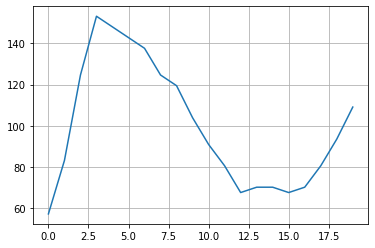

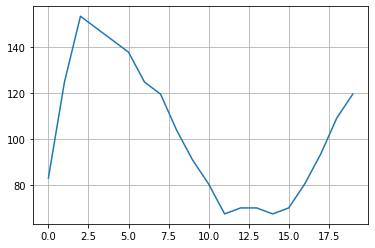

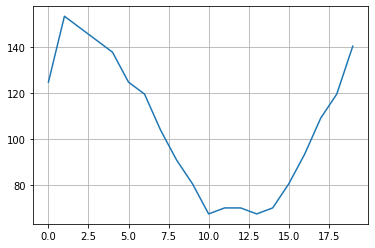

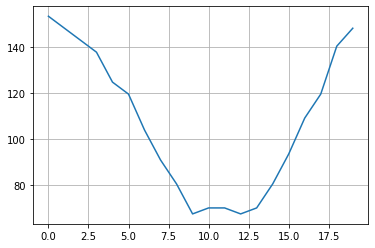

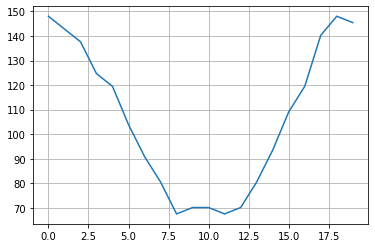

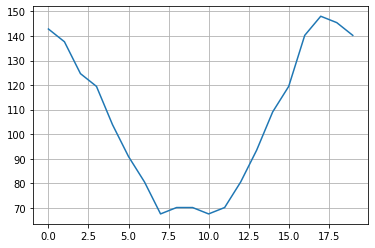

In [12]:
counter = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter < 0:
        break

# Pattern Simplifier

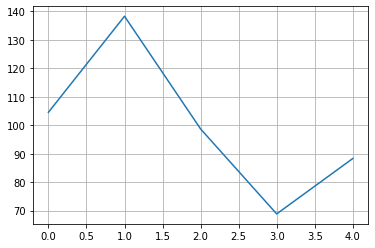

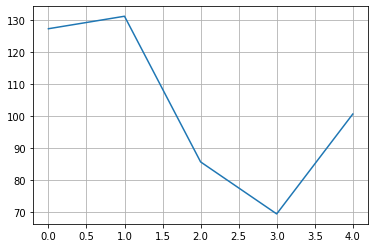

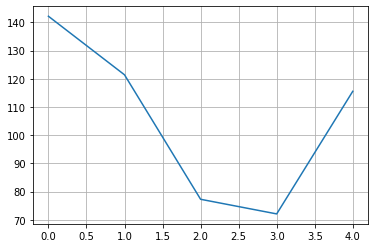

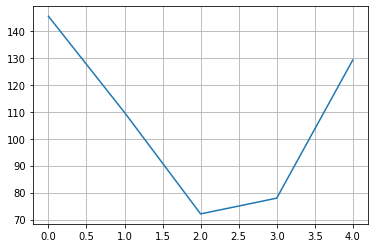

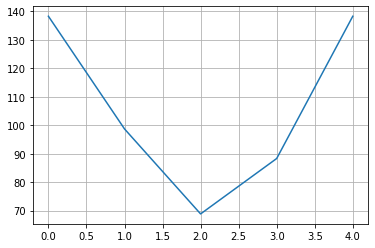

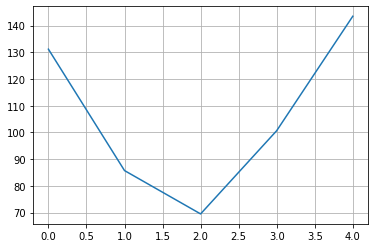

In [13]:
counter = 5
complexity = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot([np.mean(r) for r in split_seq(list(row.values), complexity)])
    plt.grid()
    plt.show()
    if counter < 0:
        break

# Creating a comparison pattern

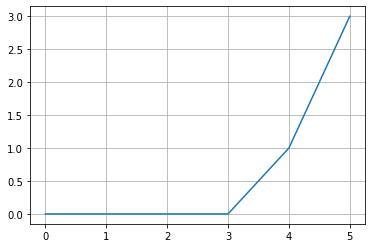

In [14]:
# let's single out the shape we want
correlate_against = [0,0,0,0,1,3] 
plt.plot(correlate_against)
plt.grid()

# Using the pearson correlation function to find the best matching shape

In [67]:
complexity = 6
outcome_list = []
if ("outcome" in timeseries_df):
    print("exists")
    timeseries_df.drop("outcome", 1, inplace=True)
for index, row in timeseries_df.iterrows():
    simplified_values = []
    for r in split_seq(list(row.values), complexity):
        simplified_values.append(np.mean(r))
    correz = pearson(simplified_values,correlate_against)
    if correz > 0.5:
        outcome_list.append(1)
    else:
        outcome_list.append(0)

np.mean(outcome_list)
# timeseries_df.columns

exists


0.28651685393258425

In [68]:
np.mean(outcome_list)

0.28651685393258425

In [69]:
timeseries_df['outcome'] = outcome_list
# timeseries_df.head(50)
timeseries_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,outcome
173,75.324675,80.519481,155.844156,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,...,85.714286,77.922078,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,0
174,80.519481,155.844156,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,...,77.922078,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468,0
175,155.844156,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,...,64.935065,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468,77.922078,0
176,148.051948,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,77.922078,...,75.324675,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468,77.922078,62.337662,0
177,137.662338,129.870130,109.090909,93.506494,75.324675,59.740260,44.155844,85.714286,77.922078,64.935065,...,67.532468,72.727273,80.519481,75.324675,75.324675,67.532468,77.922078,62.337662,64.935065,0


In [70]:
reversed_heart_pulse = []
outcomes = []
# for i, (index, row) in enumerate(timeseries_df.iterrows()):
counter = 0
while counter < len(timeseries_df.values):
#     print(timeseries_df.values[counter][0], timeseries_df.values[counter][-2])
#     print(timeseries_df.values[counter][0:-1])
    for r in timeseries_df.values[counter][0:-1]:
        reversed_heart_pulse.append(r)
        outcomes.append(timeseries_df.values[counter][-1])
    counter += 20
# print(counter-len(timeseries_df.values)+1)
# print(counter,len(timeseries_df.values))
# timeseries_df.values[-1][counter-len(timeseries_df.values):-1]
if (counter > len(timeseries_df.values)):
    for i in timeseries_df.values[-1][counter-len(timeseries_df.values)+1:-1]:
        reversed_heart_pulse.append(i)
        outcomes.append(timeseries_df.values[-1][-1])
#     print(timeseries_df.values[-1][counter-len(timeseries_df.values)+1:])
len(reversed_heart_pulse)
np.mean(outcomes)

0.30456852791878175

<bound method NDFrame.describe of            Time       Value  State
0      0.000000   57.142857    0.0
1      1.477105   83.116883    0.0
2      2.954210  124.675325    0.0
3      4.431315  153.246753    0.0
4      8.862629  148.051948    0.0
..          ...         ...    ...
192  952.732644   75.324675    0.0
193  961.595273   67.532468    0.0
194  971.935007   77.922078    0.0
195  986.706056   62.337662    0.0
196  997.045790   64.935065    0.0

[197 rows x 3 columns]>


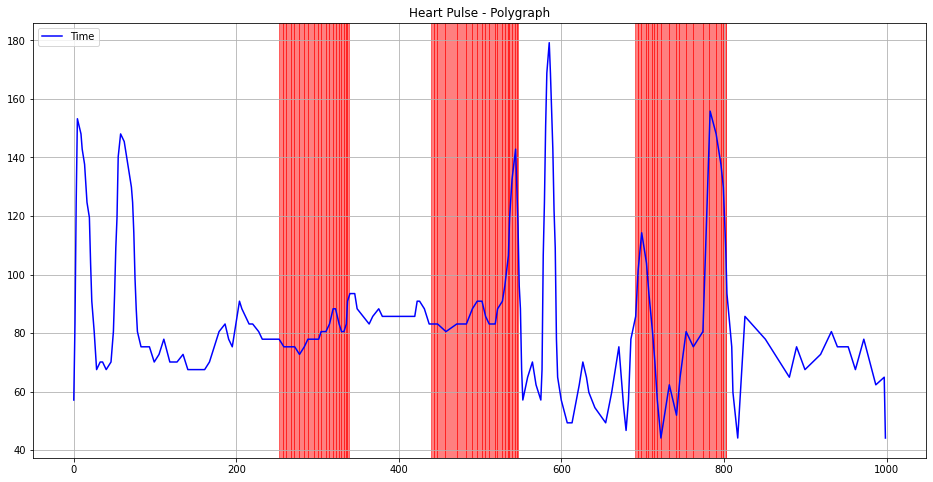

In [71]:
df = heart_polygraph
df = df[:-1]
# df["Value"] = reversed_heart_pulse
df["State"] = outcomes
print(df.describe)
plt.subplots(figsize=(16, 8))
plt.plot(heart_polygraph['Time'], heart_polygraph['Value'], label='Time', color='blue')
for i, (index, row) in enumerate(df.iterrows()):
    if (row["State"] == 1):
#         print(int(df.values[i+1]["Time"]))
#         print(int(df.iloc[i+1]["Time"]))
        plt.axvspan(int(row["Time"]), int(df.iloc[i+1]["Time"]), color='red', alpha=0.5)
plt.title('Heart Pulse - Polygraph')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [65]:
possible_lies = timeseries_df.loc[timeseries_df["outcome"] == 1].head(50)
possible_lies

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,outcome
98,88.311688,83.116883,83.116883,83.116883,83.116883,80.519481,83.116883,83.116883,88.311688,90.909091,...,85.714286,83.116883,83.116883,88.311688,90.909091,96.103896,106.493506,119.480519,132.467532,1
99,83.116883,83.116883,83.116883,83.116883,80.519481,83.116883,83.116883,88.311688,90.909091,90.909091,...,83.116883,83.116883,88.311688,90.909091,96.103896,106.493506,119.480519,132.467532,142.857143,1
100,83.116883,83.116883,83.116883,80.519481,83.116883,83.116883,88.311688,90.909091,90.909091,85.714286,...,83.116883,88.311688,90.909091,96.103896,106.493506,119.480519,132.467532,142.857143,129.870130,1


In [ ]:
for amp in max_amplitudes:
    print(heart_polygraph.loc[heart_polygraph["Value"] == amp])

In [ ]:
possible_lies = timeseries_df.loc[timeseries_df["outcome"] == 1].head(50)
# possible_lies
breaked_possible_lies = []
current_row = 0
current_group = []
first_row = True
for i, (index, row) in enumerate(possible_lies.iterrows()):
    if first_row:
        current_row = index
        current_group.append(row)
        first_row = False
    else:
        if index == current_row + 1:
            current_group.append(row)
            current_row = index
        else:
            breaked_possible_lies.append(current_group)
            current_group = []
            current_row = index
        if (i == len(possible_lies) -1):
            breaked_possible_lies.append(current_group)
max_amplitudes = []
for row in breaked_possible_lies:
    amps = []
    for r in row:
        amps.append(max(r))
    max_amplitudes.append(max(amps))
max_amplitudes